In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import datetime
import yfinance as yf
yf.pdr_override()

In [3]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

tickers = ['AXISBANK.NS','CDSL.NS','HDFCBANK.NS','PRESTIGE.NS','ITC.NS','EMAMILTD.NS','ECLERX.NS','JUBLFOOD.NS','TATASTEEL.NS','ZYDUSLIFE.NS']

In [4]:
df = pdr.get_data_yahoo(tickers, start, end)
df.head()

[*********************100%***********************]  10 of 10 completed


Adj Close                                                   \
           AXISBANK.NS     CDSL.NS    ECLERX.NS EMAMILTD.NS HDFCBANK.NS   
Date                                                                      
2018-01-01  563.940186  334.642883  1037.324829  603.927795  899.247742   
2018-01-02  557.956726  330.789886  1032.540405  592.376404  907.903198   
2018-01-03  558.904053  329.474274  1024.291748  597.666016  898.350708   
2018-01-04  558.355652  328.111633  1022.707947  600.695190  901.866150   
2018-01-05  561.696350  333.891052  1014.756287  600.378601  903.660339   

                                                                          ...  \
                ITC.NS JUBLFOOD.NS PRESTIGE.NS TATASTEEL.NS ZYDUSLIFE.NS  ...   
Date                                                                      ...   
2018-01-01  218.016312  175.342789  307.579468    27.919813   399.095337  ...   
2018-01-02  216.728027  176.897232  313.279938    28.194296   395.174042  ...   
2018-01-03  217.060486  182.641327  312.792725    28.412720   395.358521  ...   
2018-01-04  217.392960  181.476715  329.942719    29.390804   398.126587  ...   
2018-01-05  218.515030  187.951157  326.483459    29.794796   406.153687  ...   

                Volume                                                      \
           AXISBANK.NS CDSL.NS ECLERX.NS EMAMILTD.NS HDFCBANK.NS    ITC.NS   
Date                                                                         
2018-01-01     6943234  682248    108826      108444     3290258  10461011   
2018-01-02     6292268  447897     63892      209706     2388158   5688384   
2018-01-03     3990149  628390     84031      258688     2265644  11018996   
2018-01-04     2766664  462254     63891      301288     1186888   9368913   
2018-01-05     3249056  874792     81999      102240     1435434   9211954   

                                                              
           JUBLFOOD.NS PRESTIGE.NS TATASTEEL.NS ZYDUSLIFE.NS  
Date                                                          
2018-01-01     4663610       99704     19249201       803342  
2018-01-02     6492650      244625     25896915       348082  
2018-01-03    12754740      137588     27654851       472672  
2018-01-04     5925060      978071     84839667       523367  
2018-01-05    12702760      112158     74902157      1383248  

[5 rows x 60 columns]

In [5]:
df = df['Adj Close']
df.head()

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,
2018-01-01,563.940186,334.642883,1037.324829,603.927795,899.247742,218.016312,175.342789,307.579468,27.919813,399.095337
2018-01-02,557.956726,330.789886,1032.540405,592.376404,907.903198,216.728027,176.897232,313.279938,28.194296,395.174042
2018-01-03,558.904053,329.474274,1024.291748,597.666016,898.350708,217.060486,182.641327,312.792725,28.412720,395.358521
2018-01-04,558.355652,328.111633,1022.707947,600.695190,901.866150,217.392960,181.476715,329.942719,29.390804,398.126587
2018-01-05,561.696350,333.891052,1014.756287,600.378601,903.660339,218.515030,187.951157,326.483459,29.794796,406.153687


<AxesSubplot:xlabel='Date'>

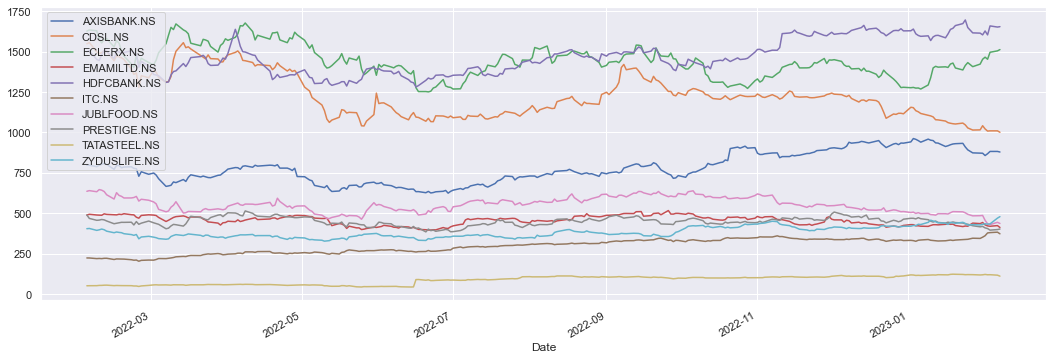

In [6]:
df.tail(252).plot(figsize=(18,6))

In [7]:
df_ret = df.pct_change().apply(lambda x: np.log(1+x)).iloc[1:,:]
df_ret.head()

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,
2018-01-02,-0.010667,-0.011581,-0.004623,-0.019312,0.009579,-0.005927,0.008826,0.018364,0.009783,-0.009874
2018-01-03,0.001696,-0.003985,-0.008021,0.008890,-0.010577,0.001533,0.031955,-0.001556,0.007717,0.000467
2018-01-04,-0.000982,-0.004144,-0.001547,0.005056,0.003906,0.001531,-0.006397,0.053378,0.033845,0.006977
2018-01-05,0.005965,0.017461,-0.007805,-0.000527,0.001987,0.005148,0.035055,-0.010540,0.013652,0.019962
2018-01-08,0.003898,-0.004231,-0.008523,0.006231,-0.001611,0.010218,0.013897,-0.007941,-0.002533,0.026453


In [8]:
#variance and covariance matrix
cov_matrix = df_ret.cov()
cov_matrix

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
AXISBANK.NS,0.000593,0.000187,0.000096,0.000126,0.000212,0.000146,0.000202,0.000208,0.000236,0.000087
CDSL.NS,0.000187,0.000521,0.000140,0.000086,0.000109,0.000105,0.000143,0.000177,0.000176,0.000094
ECLERX.NS,0.000096,0.000140,0.000713,0.000086,0.000054,0.000061,0.000110,0.000137,0.000122,0.000090
EMAMILTD.NS,0.000126,0.000086,0.000086,0.000479,0.000074,0.000075,0.000110,0.000131,0.000119,0.000102
HDFCBANK.NS,0.000212,0.000109,0.000054,0.000074,0.000284,0.000094,0.000132,0.000151,0.000142,0.000058
ITC.NS,0.000146,0.000105,0.000061,0.000075,0.000094,0.000282,0.000107,0.000115,0.000138,0.000065
JUBLFOOD.NS,0.000202,0.000143,0.000110,0.000110,0.000132,0.000107,0.000571,0.000173,0.000180,0.000140
PRESTIGE.NS,0.000208,0.000177,0.000137,0.000131,0.000151,0.000115,0.000173,0.000925,0.000203,0.000131
TATASTEEL.NS,0.000236,0.000176,0.000122,0.000119,0.000142,0.000138,0.000180,0.000203,0.001030,0.000137
ZYDUSLIFE.NS,0.000087,0.000094,0.000090,0.000102,0.000058,0.000065,0.000140,0.000131,0.000137,0.000399


In [9]:
#covariance matrix
corr_matrix = df_ret.corr()
corr_matrix

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
AXISBANK.NS,1.000000,0.336793,0.147284,0.235462,0.516776,0.356935,0.346697,0.280288,0.301869,0.179731
CDSL.NS,0.336793,1.000000,0.230536,0.171617,0.282764,0.273444,0.261456,0.254878,0.240096,0.205362
ECLERX.NS,0.147284,0.230536,1.000000,0.146946,0.121083,0.137009,0.172357,0.169183,0.141934,0.168316
EMAMILTD.NS,0.235462,0.171617,0.146946,1.000000,0.201363,0.203619,0.210091,0.196311,0.168984,0.234336
HDFCBANK.NS,0.516776,0.282764,0.121083,0.201363,1.000000,0.331627,0.328183,0.294700,0.261944,0.172981
ITC.NS,0.356935,0.273444,0.137009,0.203619,0.331627,1.000000,0.266626,0.226291,0.255469,0.194702
JUBLFOOD.NS,0.346697,0.261456,0.172357,0.210091,0.328183,0.266626,1.000000,0.238677,0.235334,0.294247
PRESTIGE.NS,0.280288,0.254878,0.169183,0.196311,0.294700,0.226291,0.238677,1.000000,0.208363,0.216262
TATASTEEL.NS,0.301869,0.240096,0.141934,0.168984,0.261944,0.255469,0.235334,0.208363,1.000000,0.213047
ZYDUSLIFE.NS,0.179731,0.205362,0.168316,0.234336,0.172981,0.194702,0.294247,0.216262,0.213047,1.000000


<AxesSubplot:title={'center':'Correlation Matrix'}>

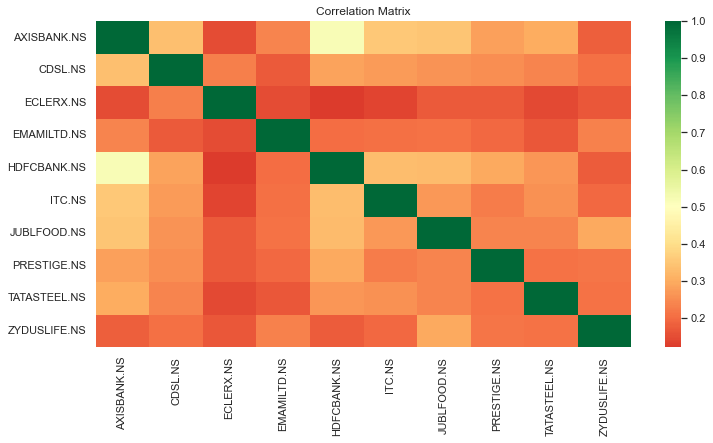

In [10]:
#heatmap of correlation matrix
plt.figure(figsize=(12,6))
plt.title('Correlation Matrix')
sns.heatmap(df_ret.corr(),cmap='RdYlGn',center=0.5)

In [11]:
weight= {}
for stock in df.columns.values:
    weight[stock] = 1/len(tickers)

In [12]:
weight

{'AXISBANK.NS': 0.1,
 'CDSL.NS': 0.1,
 'ECLERX.NS': 0.1,
 'EMAMILTD.NS': 0.1,
 'HDFCBANK.NS': 0.1,
 'ITC.NS': 0.1,
 'JUBLFOOD.NS': 0.1,
 'PRESTIGE.NS': 0.1,
 'TATASTEEL.NS': 0.1,
 'ZYDUSLIFE.NS': 0.1}

In [13]:
cov_matrix.isnull().sum()

AXISBANK.NS     0
CDSL.NS         0
ECLERX.NS       0
EMAMILTD.NS     0
HDFCBANK.NS     0
ITC.NS          0
JUBLFOOD.NS     0
PRESTIGE.NS     0
TATASTEEL.NS    0
ZYDUSLIFE.NS    0
dtype: int64

In [14]:
port_var = cov_matrix.mul(weight, axis=0).mul(weight,axis=1).sum().sum()
port_var

0.0001732783699866616

In [15]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

AXISBANK.NS     0.090814
CDSL.NS         0.583601
ECLERX.NS       0.392940
EMAMILTD.NS     0.041682
HDFCBANK.NS     0.100432
ITC.NS          0.120049
JUBLFOOD.NS     0.175466
PRESTIGE.NS     0.195763
TATASTEEL.NS    0.472679
ZYDUSLIFE.NS    0.138649
dtype: float64

In [16]:
def ind_ewma(data,span):
    ind_ret = pd.DataFrame()
    for i in range(len(tickers)):
        returns = data.iloc[:,i]
        ewma = returns.ewm(span=span,adjust=False).mean().iloc[-1]*(252/span)
        ind_ret.loc[data.columns.values[i],'Returns'] = ewma
    return ind_ret

In [17]:
ind_ewma_ret = ind_ewma(df_ret,14)
ind_ewma_ret

,Returns
AXISBANK.NS,-0.034967
CDSL.NS,-0.081025
ECLERX.NS,0.122642
EMAMILTD.NS,-0.085548
HDFCBANK.NS,0.032418
ITC.NS,0.117941
JUBLFOOD.NS,-0.181982
PRESTIGE.NS,-0.104518
TATASTEEL.NS,-0.171728
ZYDUSLIFE.NS,0.212546


In [18]:
weight = [(1/len(tickers)) for i in range(len(tickers))]
port_er = (ind_er*weight).sum()
port_er

0.23120752585945345

In [19]:
from arch import arch_model
# Specify a list of possible GARCH models
def Garch(data):
    ann_sd = pd.DataFrame()
    for i in range(len(data.columns.values)):
        returns = data.iloc[:,i]
        models = [arch_model(returns, mean='Constant', vol='GARCH', p=1, q=1),
                  arch_model(returns, mean='Constant', vol='GARCH', p=1, q=2),
                  arch_model(returns, mean='Constant', vol='GARCH', p=2, q=1),
                 arch_model(returns, mean='Constant', vol='GARCH', p=2, q=2),
                 arch_model(returns, mean='Constant', vol='GARCH', p=3, q=1),
                 arch_model(returns, mean='Constant', vol='GARCH', p=3, q=2),
                 arch_model(returns, mean='Constant', vol='GARCH', p=3, q=3)]
        best_model = None
        best_aic = float('inf')
        best_bic = float('inf')
        for model in models:
            results = model.fit(disp='off')
            if results.aic < best_aic:
                best_model = model
                best_aic = results.aic
                best_bic = results.bic
        print(f' {data.columns.values[i]}: {best_model.volatility}')
        ann_sd.loc[df_ret.columns.values[i],'Volatilty'] = np.sqrt(results.forecast(horizon=1).variance.iloc[-1,0])
    ann_sd = ann_sd.apply(lambda x: x*np.sqrt(250))
    return ann_sd

In [20]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd_basic = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd_basic

AXISBANK.NS     0.385049
CDSL.NS         0.360905
ECLERX.NS       0.422149
EMAMILTD.NS     0.346075
HDFCBANK.NS     0.266395
ITC.NS          0.265350
JUBLFOOD.NS     0.377697
PRESTIGE.NS     0.480818
TATASTEEL.NS    0.507449
ZYDUSLIFE.NS    0.315764
dtype: float64

In [21]:
ann_sd_garch = Garch(df_ret)

 AXISBANK.NS: GARCH(p: 2, q: 1)
 CDSL.NS: GARCH(p: 3, q: 3)
 ECLERX.NS: GARCH(p: 1, q: 2)
 EMAMILTD.NS: GARCH(p: 1, q: 2)
 HDFCBANK.NS: GARCH(p: 1, q: 1)
 ITC.NS: GARCH(p: 3, q: 1)
 JUBLFOOD.NS: GARCH(p: 3, q: 1)
 PRESTIGE.NS: GARCH(p: 1, q: 2)
 TATASTEEL.NS: GARCH(p: 1, q: 2)
 ZYDUSLIFE.NS: GARCH(p: 1, q: 1)


In [22]:
ann_sd_garch

,Volatilty
AXISBANK.NS,0.275839
CDSL.NS,0.242293
ECLERX.NS,0.310341
EMAMILTD.NS,0.328264
HDFCBANK.NS,0.270373
ITC.NS,0.300472
JUBLFOOD.NS,0.421628
PRESTIGE.NS,0.315236
TATASTEEL.NS,0.355391
ZYDUSLIFE.NS,0.428644


In [23]:
assets = pd.concat([ind_ewma_ret, ann_sd_garch], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AXISBANK.NS,-0.034967,0.275839
CDSL.NS,-0.081025,0.242293
ECLERX.NS,0.122642,0.310341
EMAMILTD.NS,-0.085548,0.328264
HDFCBANK.NS,0.032418,0.270373
ITC.NS,0.117941,0.300472
JUBLFOOD.NS,-0.181982,0.421628
PRESTIGE.NS,-0.104518,0.315236
TATASTEEL.NS,-0.171728,0.355391
ZYDUSLIFE.NS,0.212546,0.428644


In [41]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [42]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = np.square(ann_sd_garch).mul(np.square(weights),axis=0).sum().sum()
    sd = np.sqrt(var)# Portfolio Variance # Daily standard deviation
    p_vol.append(sd)

In [43]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [44]:
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,AXISBANK.NS weight,CDSL.NS weight,ECLERX.NS weight,EMAMILTD.NS weight,HDFCBANK.NS weight,ITC.NS weight,JUBLFOOD.NS weight,PRESTIGE.NS weight,TATASTEEL.NS weight,ZYDUSLIFE.NS weight
0,0.200054,0.131690,0.095702,0.095114,0.098589,0.169733,0.035905,0.060911,0.086628,0.112595,0.023754,0.221070
1,0.199593,0.116017,0.105505,0.090708,0.031900,0.084249,0.172463,0.087719,0.126320,0.072518,0.075196,0.153422
2,0.200600,0.134027,0.153984,0.069924,0.085412,0.024085,0.019832,0.211571,0.001570,0.214870,0.033479,0.185272
3,0.168572,0.142982,0.155834,0.047250,0.075617,0.139959,0.026336,0.154540,0.051892,0.057750,0.028045,0.262777
4,0.212666,0.110512,0.157119,0.154391,0.075983,0.113804,0.137798,0.047225,0.057376,0.108630,0.007117,0.140555


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

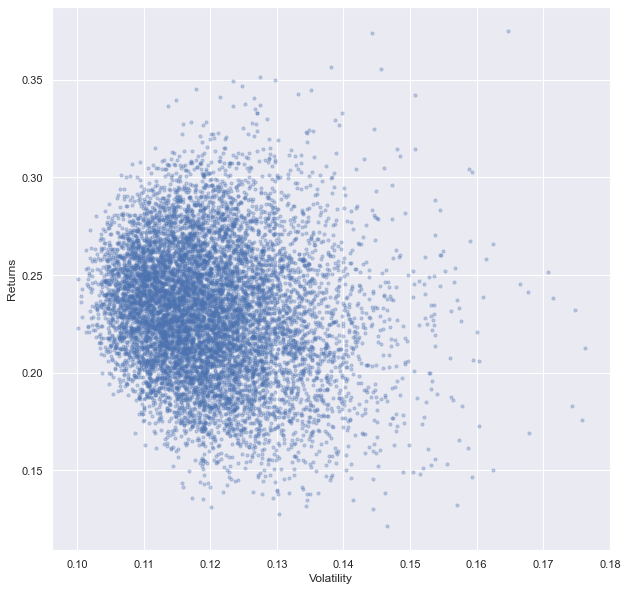

In [45]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [46]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                0.248112
Volatility             0.100089
AXISBANK.NS weight     0.136005
CDSL.NS weight         0.159861
ECLERX.NS weight       0.094321
EMAMILTD.NS weight     0.119313
HDFCBANK.NS weight     0.135835
ITC.NS weight          0.072432
JUBLFOOD.NS weight     0.069275
PRESTIGE.NS weight     0.079416
TATASTEEL.NS weight    0.095424
ZYDUSLIFE.NS weight    0.038118
Name: 4503, dtype: float64

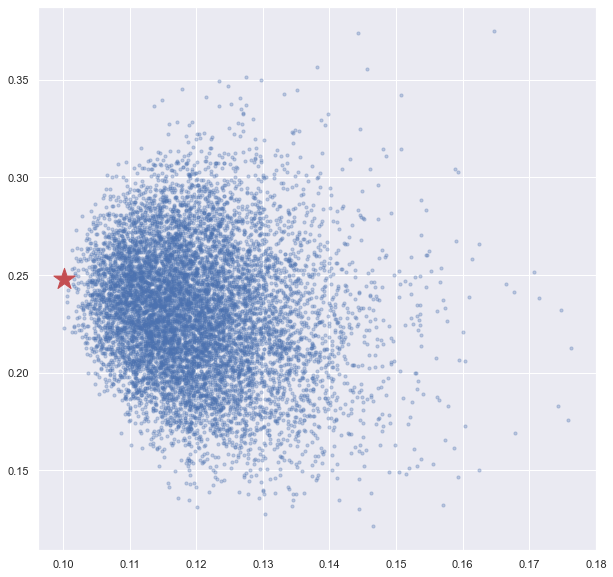

In [47]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)


In [48]:
# Finding the optimal portfolio
rf = 0.05 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                0.339717
Volatility             0.114838
AXISBANK.NS weight     0.109435
CDSL.NS weight         0.263667
ECLERX.NS weight       0.159880
EMAMILTD.NS weight     0.063296
HDFCBANK.NS weight     0.014814
ITC.NS weight          0.033758
JUBLFOOD.NS weight     0.033357
PRESTIGE.NS weight     0.159583
TATASTEEL.NS weight    0.135668
ZYDUSLIFE.NS weight    0.026544
Name: 178, dtype: float64

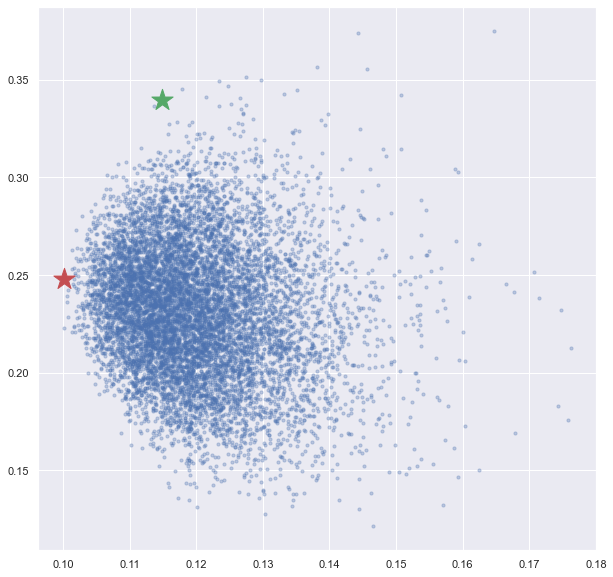

In [49]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

## Market Risk  Estimation for Optimal Portfolio

In [50]:
optim_portfolio = optimal_risky_port.iloc[2:]
optim_portfolio.index = optim_portfolio.index.str.replace('weight','')
optim_portfolio

AXISBANK.NS      0.109435
CDSL.NS          0.263667
ECLERX.NS        0.159880
EMAMILTD.NS      0.063296
HDFCBANK.NS      0.014814
ITC.NS           0.033758
JUBLFOOD.NS      0.033357
PRESTIGE.NS      0.159583
TATASTEEL.NS     0.135668
ZYDUSLIFE.NS     0.026544
Name: 178, dtype: float64

In [51]:
corr_matrix

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
AXISBANK.NS,1.000000,0.336793,0.147284,0.235462,0.516776,0.356935,0.346697,0.280288,0.301869,0.179731
CDSL.NS,0.336793,1.000000,0.230536,0.171617,0.282764,0.273444,0.261456,0.254878,0.240096,0.205362
ECLERX.NS,0.147284,0.230536,1.000000,0.146946,0.121083,0.137009,0.172357,0.169183,0.141934,0.168316
EMAMILTD.NS,0.235462,0.171617,0.146946,1.000000,0.201363,0.203619,0.210091,0.196311,0.168984,0.234336
HDFCBANK.NS,0.516776,0.282764,0.121083,0.201363,1.000000,0.331627,0.328183,0.294700,0.261944,0.172981
ITC.NS,0.356935,0.273444,0.137009,0.203619,0.331627,1.000000,0.266626,0.226291,0.255469,0.194702
JUBLFOOD.NS,0.346697,0.261456,0.172357,0.210091,0.328183,0.266626,1.000000,0.238677,0.235334,0.294247
PRESTIGE.NS,0.280288,0.254878,0.169183,0.196311,0.294700,0.226291,0.238677,1.000000,0.208363,0.216262
TATASTEEL.NS,0.301869,0.240096,0.141934,0.168984,0.261944,0.255469,0.235334,0.208363,1.000000,0.213047
ZYDUSLIFE.NS,0.179731,0.205362,0.168316,0.234336,0.172981,0.194702,0.294247,0.216262,0.213047,1.000000


In [52]:
from copulas.multivariate import GaussianMultivariate

In [53]:
copula = GaussianMultivariate()

In [54]:
copula.fit(df_ret)

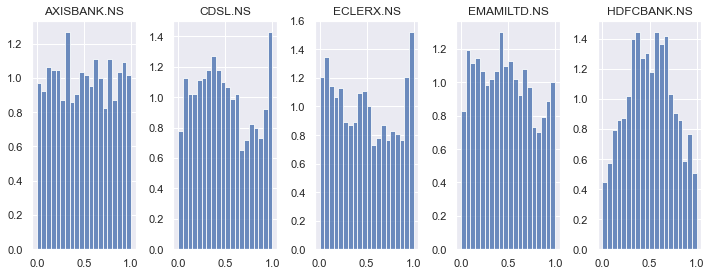

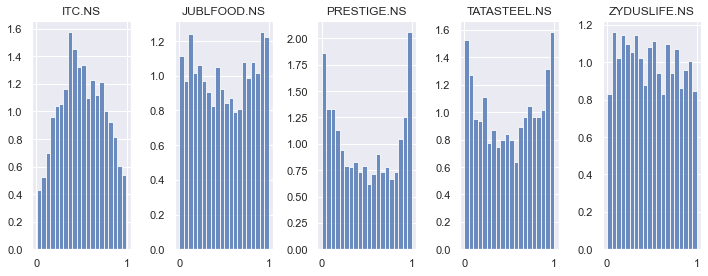

In [55]:
from copulas.visualization import hist_1d, side_by_side
cdf_0 = copula.univariates[0].cdf(df_ret[df_ret.columns.values[0]])
cdf_1 = copula.univariates[0].cdf(df_ret[df_ret.columns.values[1]])
cdf_2 = copula.univariates[0].cdf(df_ret[df_ret.columns.values[2]])
cdf_3 = copula.univariates[0].cdf(df_ret[df_ret.columns.values[3]])
cdf_4 = copula.univariates[0].cdf(df_ret[df_ret.columns.values[4]])
cdf_5 = copula.univariates[0].cdf(df_ret[df_ret.columns.values[5]])
cdf_6 = copula.univariates[0].cdf(df_ret[df_ret.columns.values[6]])
cdf_7 = copula.univariates[0].cdf(df_ret[df_ret.columns.values[7]])
cdf_8 = copula.univariates[0].cdf(df_ret[df_ret.columns.values[8]])
cdf_9 = copula.univariates[0].cdf(df_ret[df_ret.columns.values[9]])

side_by_side(hist_1d, {df_ret.columns.values[0]: cdf_0, df_ret.columns.values[1]: cdf_1,
                      df_ret.columns.values[2]: cdf_2, df_ret.columns.values[3]: cdf_3,
                      df_ret.columns.values[4]: cdf_4})

side_by_side(hist_1d, {df_ret.columns.values[5]: cdf_5,
                      df_ret.columns.values[6]: cdf_6, df_ret.columns.values[7]: cdf_7,
                      df_ret.columns.values[8]: cdf_8, df_ret.columns.values[9]: cdf_9})

In [56]:
synthetic = copula.sample(len(df_ret))

In [57]:
synthetic.head()

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
0,-0.015531,-0.012798,-0.005722,-0.048908,-0.004566,0.002874,-0.002633,0.026960,-0.020231,0.002502
1,0.015678,-0.014320,0.003479,-0.006506,0.004404,-0.000295,0.002364,-0.001661,-0.033037,-0.011623
2,0.000109,-0.013459,-0.018150,-0.001709,0.007169,0.008114,-0.013339,0.018624,-0.019042,-0.008972
3,0.029334,-0.010524,0.008649,0.001656,0.056931,0.019604,0.039148,0.051061,0.002039,0.027450
4,-0.001914,0.008367,0.001800,-0.010637,0.008322,0.012565,0.007585,0.022442,-0.001604,-0.001745


In [58]:
from copulas.visualization import compare_2d

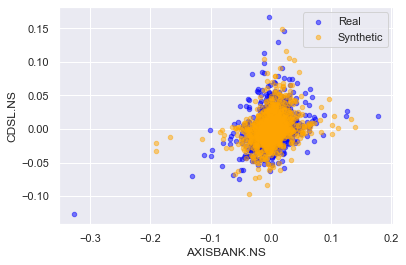

In [59]:
compare_2d(df_ret.iloc[:,:2], synthetic.iloc[:,:2])

In [61]:
optim_portfolio

AXISBANK.NS      0.109435
CDSL.NS          0.263667
ECLERX.NS        0.159880
EMAMILTD.NS      0.063296
HDFCBANK.NS      0.014814
ITC.NS           0.033758
JUBLFOOD.NS      0.033357
PRESTIGE.NS      0.159583
TATASTEEL.NS     0.135668
ZYDUSLIFE.NS     0.026544
Name: 178, dtype: float64

In [62]:
optim_portfolio.shape

(10,)

In [63]:
synthetic.shape

(1261, 10)

In [64]:
optim_portfolio

AXISBANK.NS      0.109435
CDSL.NS          0.263667
ECLERX.NS        0.159880
EMAMILTD.NS      0.063296
HDFCBANK.NS      0.014814
ITC.NS           0.033758
JUBLFOOD.NS      0.033357
PRESTIGE.NS      0.159583
TATASTEEL.NS     0.135668
ZYDUSLIFE.NS     0.026544
Name: 178, dtype: float64

In [65]:
synthetic

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
0,-0.015531,-0.012798,-0.005722,-0.048908,-0.004566,0.002874,-0.002633,0.026960,-0.020231,0.002502
1,0.015678,-0.014320,0.003479,-0.006506,0.004404,-0.000295,0.002364,-0.001661,-0.033037,-0.011623
2,0.000109,-0.013459,-0.018150,-0.001709,0.007169,0.008114,-0.013339,0.018624,-0.019042,-0.008972
3,0.029334,-0.010524,0.008649,0.001656,0.056931,0.019604,0.039148,0.051061,0.002039,0.027450
4,-0.001914,0.008367,0.001800,-0.010637,0.008322,0.012565,0.007585,0.022442,-0.001604,-0.001745
...,...,...,...,...,...,...,...,...,...,...
1256,-0.021753,0.019036,0.046526,0.033429,-0.001280,0.001284,-0.021727,-0.007422,-0.000372,-0.011561
1257,0.016753,0.004552,-0.008879,-0.020945,-0.009371,0.003075,0.007682,0.023456,0.003778,0.003489
1258,-0.002215,-0.013687,-0.020619,0.004738,-0.004920,0.014353,0.001428,0.025706,-0.005453,0.002201
1259,-0.005239,0.002389,-0.007939,0.001873,0.009714,0.014227,-0.038582,-0.038702,-0.001416,0.004287


In [66]:
synthetic.columns

Index(['AXISBANK.NS', 'CDSL.NS', 'ECLERX.NS', 'EMAMILTD.NS', 'HDFCBANK.NS',
       'ITC.NS', 'JUBLFOOD.NS', 'PRESTIGE.NS', 'TATASTEEL.NS', 'ZYDUSLIFE.NS'],
      dtype='object')

In [67]:
optim_portfolio.index

Index(['AXISBANK.NS ', 'CDSL.NS ', 'ECLERX.NS ', 'EMAMILTD.NS ',
       'HDFCBANK.NS ', 'ITC.NS ', 'JUBLFOOD.NS ', 'PRESTIGE.NS ',
       'TATASTEEL.NS ', 'ZYDUSLIFE.NS '],
      dtype='object')

In [68]:
optim_portfolio.reset_index(drop=True,inplace=True)
synthetic.columns = [0,1,2,3,4,5,6,7,8,9]

In [69]:
optim_portfolio

0    0.109435
1    0.263667
2    0.159880
3    0.063296
4    0.014814
5    0.033758
6    0.033357
7    0.159583
8    0.135668
9    0.026544
Name: 178, dtype: float64

In [70]:
synthetic

,0,1,2,3,4,5,6,7,8,9
0,-0.015531,-0.012798,-0.005722,-0.048908,-0.004566,0.002874,-0.002633,0.026960,-0.020231,0.002502
1,0.015678,-0.014320,0.003479,-0.006506,0.004404,-0.000295,0.002364,-0.001661,-0.033037,-0.011623
2,0.000109,-0.013459,-0.018150,-0.001709,0.007169,0.008114,-0.013339,0.018624,-0.019042,-0.008972
3,0.029334,-0.010524,0.008649,0.001656,0.056931,0.019604,0.039148,0.051061,0.002039,0.027450
4,-0.001914,0.008367,0.001800,-0.010637,0.008322,0.012565,0.007585,0.022442,-0.001604,-0.001745
...,...,...,...,...,...,...,...,...,...,...
1256,-0.021753,0.019036,0.046526,0.033429,-0.001280,0.001284,-0.021727,-0.007422,-0.000372,-0.011561
1257,0.016753,0.004552,-0.008879,-0.020945,-0.009371,0.003075,0.007682,0.023456,0.003778,0.003489
1258,-0.002215,-0.013687,-0.020619,0.004738,-0.004920,0.014353,0.001428,0.025706,-0.005453,0.002201
1259,-0.005239,0.002389,-0.007939,0.001873,0.009714,0.014227,-0.038582,-0.038702,-0.001416,0.004287


In [71]:
synthetic.columns.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [72]:
synthetic_port = pd.DataFrame()

In [73]:
for i in range(len(synthetic)):
    ret = (optim_portfolio * synthetic.iloc[i,:]).sum()
    synthetic_port.loc[i,'returns'] = ret

In [74]:
synthetic_port

,returns
0,-0.007519
1,-0.006837
2,-0.006461
3,0.013888
4,0.005729
...,...
1256,0.009951
1257,0.004858
1258,-0.002968
1259,-0.008011


In [78]:
# Sort the returns
synthetic_port.sort_values('returns', inplace = True, ascending =  True)
# Calculate the VaR for 90%, 95%, and 99% confidence levels using quantile function
VaR_90 = synthetic_port['returns'].quantile(0.1)
VaR_95 = synthetic_port['returns'].quantile(0.05)
VaR_99 = synthetic_port['returns'].quantile(0.01)
print(f'90% daily VaR: {VaR_90}')
print(f'95% daily VaR: {VaR_95}')
print(f'99% daily VaR: {VaR_99}')

90% daily VaR: -0.016810997237566176
95% daily VaR: -0.024361478920553157
99% daily VaR: -0.03454646567361692


In [82]:
def expected_shortfall(returns, confidence_level):
    sorted_returns = np.sort(returns)
    index = int(confidence_level * len(sorted_returns))
    expected_shortfall = np.mean(sorted_returns[:index])
    return expected_shortfall

In [84]:
es_90 = expected_shortfall(synthetic_port, 0.1)
es_95 = expected_shortfall(synthetic_port, 0.05)
es_99 = expected_shortfall(synthetic_port, 0.01)
print("Expected Shortfall at 90% confidence:", es_90)
print("Expected Shortfall at 95% confidence:", es_95)
print("Expected Shortfall at 99% confidence:", es_99)

Expected Shortfall at 90% confidence: -0.026173317358617592
Expected Shortfall at 95% confidence: -0.031681945666296334
Expected Shortfall at 99% confidence: -0.04358662640747768
